<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started</a></span></li><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variable description</a></span></li><li><span><a href="#Starting-our-Data-Cleaning" data-toc-modified-id="Starting-our-Data-Cleaning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Starting our Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Checking-Data-Types" data-toc-modified-id="Checking-Data-Types-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Checking Data Types</a></span></li></ul></li><li><span><a href="#Investigating-Outliers" data-toc-modified-id="Investigating-Outliers-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Investigating Outliers</a></span></li></ul></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the Data</a></span><ul class="toc-item"><li><span><a href="#Investigate-linearity-assumption" data-toc-modified-id="Investigate-linearity-assumption-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Investigate linearity assumption</a></span></li></ul></li><li><span><a href="#Comments-on-P-Values" data-toc-modified-id="Comments-on-P-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Comments on P-Values</a></span><ul class="toc-item"><li><span><a href="#Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model" data-toc-modified-id="Interpret-a-Correlation-Heatmap-to-Build-a-Baseline-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Interpret a Correlation Heatmap to Build a Baseline Model</a></span></li><li><span><a href="#Normalize-Data" data-toc-modified-id="Normalize-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Normalize Data</a></span></li></ul></li><li><span><a href="#Building-a-Baseline-Model" data-toc-modified-id="Building-a-Baseline-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building a Baseline Model</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model 4</a></span><ul class="toc-item"><li><span><a href="#LOGS" data-toc-modified-id="LOGS-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>LOGS</a></span></li><li><span><a href="#Testing-Our-Final-Model" data-toc-modified-id="Testing-Our-Final-Model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Testing Our Final Model</a></span></li><li><span><a href="#Checking-Normality" data-toc-modified-id="Checking-Normality-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Checking Normality</a></span></li></ul></li><li><span><a href="#Check-Homoscedasticity-Assumption" data-toc-modified-id="Check-Homoscedasticity-Assumption-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Check Homoscedasticity Assumption</a></span><ul class="toc-item"><li><span><a href="#Making-Predictions" data-toc-modified-id="Making-Predictions-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Making Predictions</a></span></li><li><span><a href="#Preprocess-Test-Data" data-toc-modified-id="Preprocess-Test-Data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Preprocess Test Data</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Final Model</a></span></li></ul></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

### Getting Started
You'll find the resulting dataset from your work in the Obtaining Data Lab stored within the file 'KC_house_data.csv'.

In the cells below:

Import pandas and set the standard alias.
Import numpy and set the standard alias.
Import matplotlib.pyplot and set the standard alias.
Import seaborn and set the alias sns (this is the standard alias for seaborn).
Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook.
Load the dataset stored in the 'Lego_data_merged.csv' file into a DataFrame, df.
Inspect the head of the DataFrame to ensure everything loaded correctly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Variable description
Here are some brief explanations of the variables used in this project :



* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
 


We will conduct data cleaning, exploration and feature engineering on the training set as well as build our prediction model using this subset.

In [3]:
#The prediction target for this analysis is the sale price of the home, so we separate the data into X and y accordingly:
y = data["price"]
X = data.drop("price", axis=1)

In [4]:
# Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 16197 rows and 20 columns
y_train is a Series with 16197 values


In [6]:
# Set df as our training set, including features and target
df = pd.concat([X_train, y_train], axis = 1)

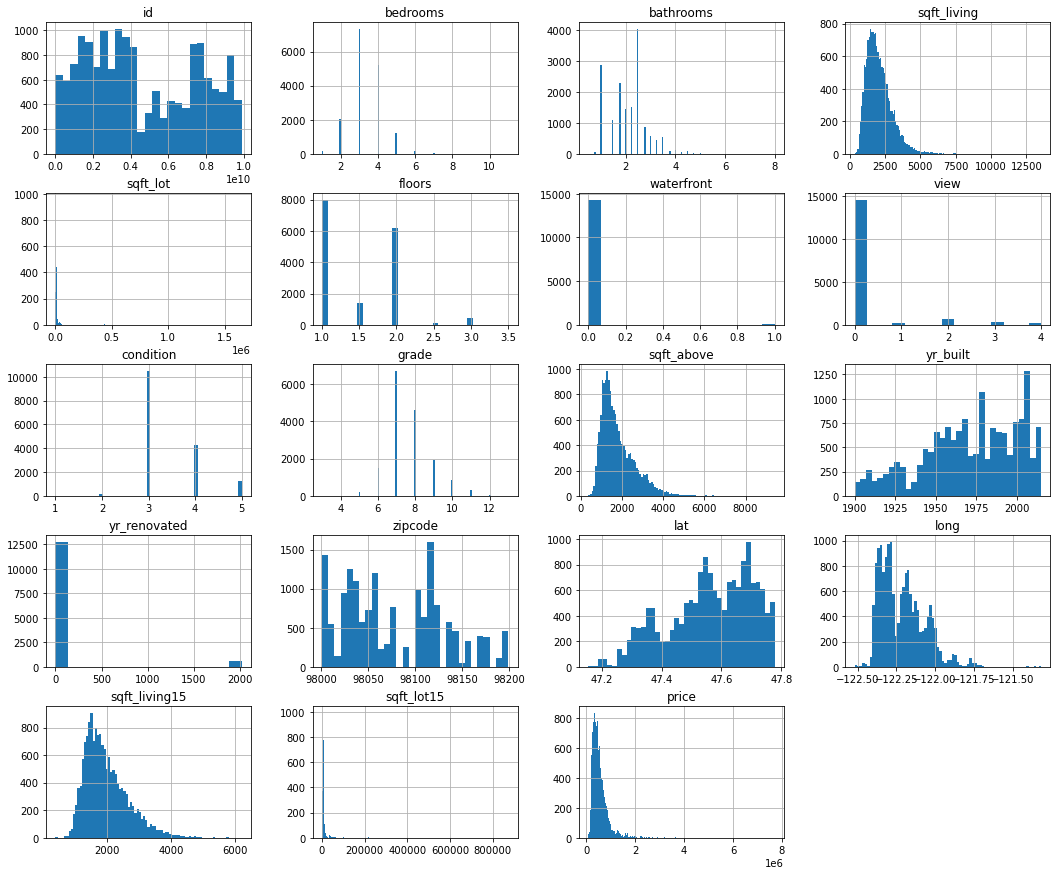

In [7]:
# Clearly we have categorical and continuous data
df.hist(figsize=(18,15), bins='auto');

In [8]:

# price, sqft_above, sqft_basement, sqft_living, sqft_lot are all continuous and appear to be log normally distributed.
# Most values are bunched towards the lower end while there are a few very large values
# We can see that there is an increase in the number of houses built as time goes on. Most houses sold were built in the 2000s

### Starting our Data Cleaning
To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

#### Checking Data Types
In the cell below, use the appropriate method to check the data type of each column.

In [9]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     14441 non-null  float64
 8   view           16148 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  object 
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   13318 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float64
 18  sqf

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


From description we can infer that

- Average price of house sold in King County is 540,088
- Max price of home sale is 770,0000
- Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
- Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

In [11]:
df.shape

(16197, 21)

In [12]:
df.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1756
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

In [13]:
# waterfront value is null. Using logic, it probably means that the property is not 
df.waterfront.unique()

array([ 0., nan,  1.])

In [14]:
# fill nan with 0 (not waterfront property)
df.waterfront.fillna(0,inplace=True)
df.isna().sum()

id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               49
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     2879
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

In [15]:
# 0 denotes property has not been renovated
df.yr_renovated.value_counts()

0.0       12771
2014.0       49
2005.0       24
2013.0       23
2003.0       23
          ...  
1950.0        1
1954.0        1
1971.0        1
1978.0        1
1940.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [16]:
# Let's fill in the missing values to reflect the fact that
# the houses haven't been renovated

df.yr_renovated.fillna(0,inplace=True)
df.isna().sum()

id                0
date              0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             49
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
price             0
dtype: int64

In [17]:
#checking out the view column
df.view.unique()

array([ 0.,  3.,  2.,  4.,  1., nan])

In [18]:
# This looks like how many times the property was viewed before being sold

In [19]:
# Let's assume missing values mean the home wasn't viewed
df.view.fillna(0,inplace=True)

In [20]:
# Numerical Data Stored as Strings
# we need to change the data type of sqft_basement because it's a string when
# it needs to be converted to a float
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [21]:
# checking out the values to see if there are any symbols
# is the basement square footage really not know? Or is it a function of sqft_living?

df.sqft_basement.unique()

array(['0.0', '710.0', '760.0', '530.0', '600.0', '880.0', '960.0',
       '560.0', '1120.0', '300.0', '?', '650.0', '1040.0', '1020.0',
       '380.0', '610.0', '508.0', '110.0', '310.0', '1090.0', '510.0',
       '680.0', '230.0', '730.0', '580.0', '210.0', '1060.0', '540.0',
       '640.0', '800.0', '140.0', '1150.0', '1800.0', '910.0', '500.0',
       '740.0', '1400.0', '240.0', '550.0', '810.0', '1030.0', '420.0',
       '720.0', '1110.0', '440.0', '120.0', '220.0', '840.0', '750.0',
       '1852.0', '870.0', '330.0', '850.0', '1000.0', '770.0', '400.0',
       '370.0', '790.0', '630.0', '1660.0', '360.0', '820.0', '1870.0',
       '350.0', '940.0', '1320.0', '1010.0', '570.0', '780.0', '250.0',
       '950.0', '1300.0', '620.0', '480.0', '1200.0', '460.0', '2500.0',
       '1160.0', '920.0', '1390.0', '890.0', '980.0', '900.0', '1230.0',
       '320.0', '1580.0', '1190.0', '1050.0', '260.0', '430.0', '1500.0',
       '1270.0', '990.0', '2060.0', '1100.0', '290.0', '1080.0', '190.

In [22]:
# we can see that sqft_living = sqft_above + sqft_basement
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
6405,1880,1880,0.0
937,2020,1310,710.0
19076,4720,3960,760.0
15201,1430,1430,0.0
13083,2270,1740,530.0
...,...,...,...
11964,2230,2230,0.0
21575,2770,2770,0.0
5390,1530,1530,0.0
860,380,380,0.0


In [23]:
# make a copy to drop "?" values to perform boolean comparison
test_df = df.copy()
test_df = test_df[test_df.sqft_basement != '?']
# needed a separate line of code for '0.0' as .astype(float) would error
test_df.sqft_basement[test_df.sqft_basement == '0.0'] = 0
# now I can convert datatype of the whole set to float
test_df.sqft_basement = test_df.sqft_basement.astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15857 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15857 non-null  int64  
 1   date           15857 non-null  object 
 2   bedrooms       15857 non-null  int64  
 3   bathrooms      15857 non-null  float64
 4   sqft_living    15857 non-null  int64  
 5   sqft_lot       15857 non-null  int64  
 6   floors         15857 non-null  float64
 7   waterfront     15857 non-null  float64
 8   view           15857 non-null  float64
 9   condition      15857 non-null  int64  
 10  grade          15857 non-null  int64  
 11  sqft_above     15857 non-null  int64  
 12  sqft_basement  15857 non-null  float64
 13  yr_built       15857 non-null  int64  
 14  yr_renovated   15857 non-null  float64
 15  zipcode        15857 non-null  int64  
 16  lat            15857 non-null  float64
 17  long           15857 non-null  float64
 18  sqf

Now let's see if this relationship between the 3 variables is consistent throughout the entire dataset

In [24]:
(test_df.sqft_basement != test_df.sqft_living - test_df.sqft_above).sum()

0


Thus we can conclude that any row with a value of '?' in the sqft_basement column can be replaced by adding the data from sqft_living and sqft_above.

In [25]:
difference = (df.loc[df["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(df.loc[df["sqft_basement"] == '?', ["sqft_above"]]).values
df.loc[df["sqft_basement"] == '?', ["sqft_basement"]] = difference

In [26]:
#change the dtype to int64 to be consistent with the rest of the 'sqft' variables
df.sqft_basement = df.sqft_basement.astype(float)
df.sqft_basement = df.sqft_basement.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     16197 non-null  float64
 8   view           16197 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  int64  
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   16197 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float64
 18  sqf

### Investigating Outliers

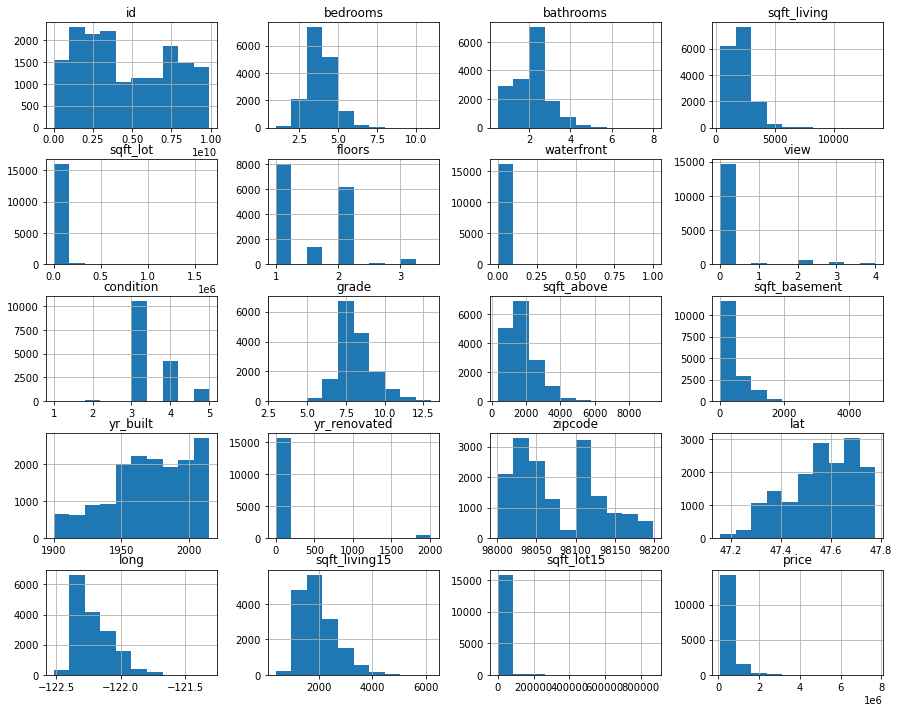

In [27]:
df.hist(figsize = (15,12))
plt.show()

In [28]:

# Define function to remove outliers
def remove_outliers(df):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(X_train[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [29]:
# Apply function to df
df = remove_outliers(df)

In [30]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,...,1880,0,1993,0.0,98029,47.5664,-121.999,2130,5114,529000.0
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,...,1310,710,1994,0.0,98042,47.3545,-122.158,1710,5151,253000.0
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,...,1430,0,1949,0.0,98117,47.6844,-122.392,1430,3880,545000.0
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,...,1740,530,1980,0.0,98042,47.3451,-122.094,2310,41606,390000.0
16852,7841300285,8/11/2014,1,1.50,1048,4800,1.0,0.0,0.0,3,...,1048,0,1942,0.0,98055,47.4759,-122.212,950,4800,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,...,2230,0,2004,0.0,98065,47.5308,-121.847,2230,6088,440000.0
21575,4140940150,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,...,2770,0,2014,0.0,98178,47.5001,-122.232,1810,5641,572000.0
5390,8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,...,1530,0,1976,0.0,98014,47.6492,-121.908,1520,8500,299800.0
860,1723049033,6/20/2014,1,0.75,380,15000,1.0,0.0,0.0,3,...,380,0,1963,0.0,98168,47.4810,-122.323,1170,15000,245000.0


## Exploring the Data

### Investigate linearity assumption

Not terrible, we are explaining between 71% and 69% of the variance in the target with our current feature set. Let's say that this is our final model and move on to preparing the test data.

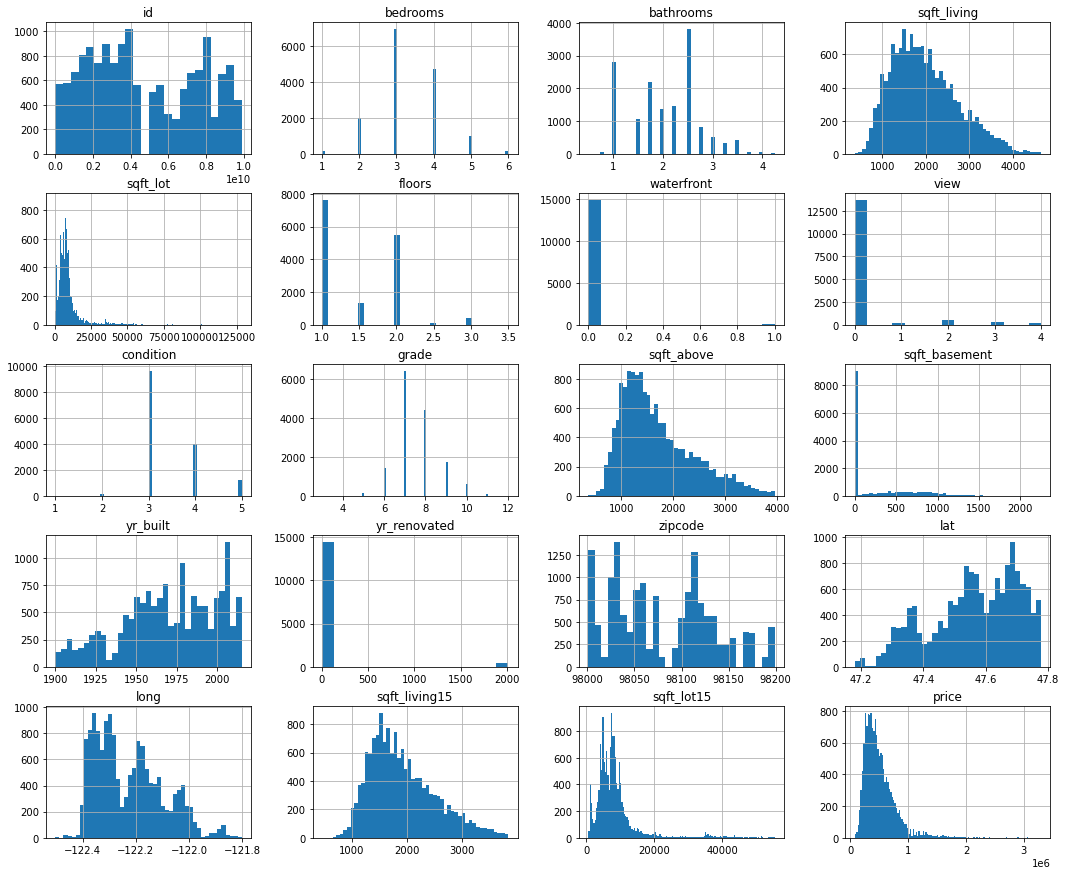

In [31]:
df.hist(figsize=(18,15), bins='auto');

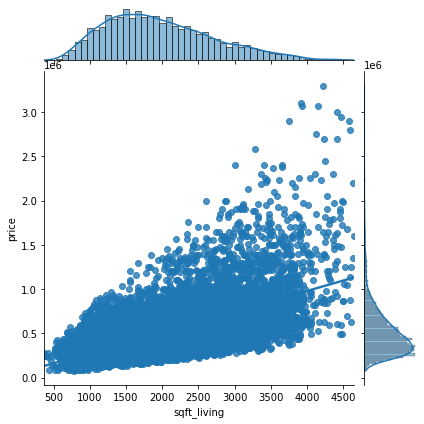

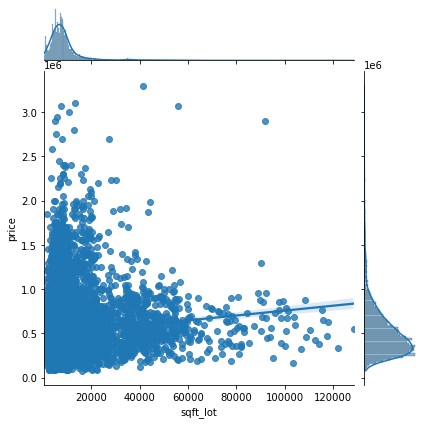

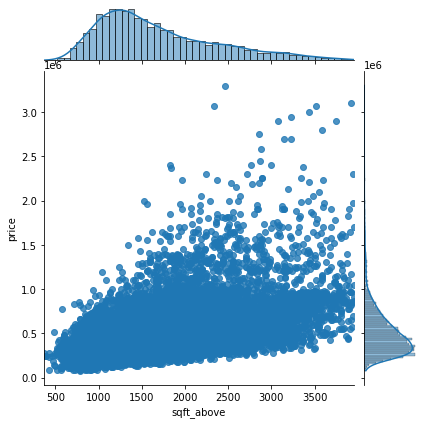

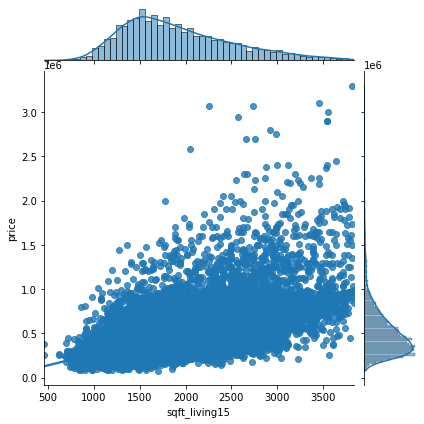

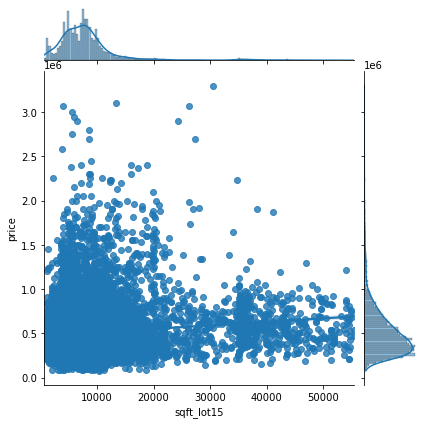

In [32]:
# Define list of continuous variables
cont_feat = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in cont_feat:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')

P values show that all are relevant, right?

Assessing the Model
When performing an initial assessment of the model you might focus on a number of different perspectives. There are metrics assessing the overall accuracy of the model including  𝑟2  and mean square error. There are also many metrics when analyzing how various features contribute to the overall model. These are essential to building a story and intuition behind the model so that educated business strategies can be implemented to optimize the target variable. After all, typically you aren't solely interested in predicting a quantity in a black box given said information. Rather, you would often like to know the underlying influencers and how those can be adjusted in order to increase or decrease the final measured quantity whether it be sales, customer base, costs, or risk. Such metrics would include p-values associated with the various features, comparing models with features removed and investigating potential multicollinearity in the model. Multicollinearity also touches upon checking model assumptions. One underlying intuition motivating the regression model is that the features constitute a set of levers which, if appropriately adjusted, account for the target variable. The theory then goes that the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed.

## Comments on P-Values

Based on the p-values above, you can see that there are a number of extraneous features. Recall that a common significance cutoff is 0.05. The refined model should eliminate these irrelevant features.

### Interpret a Correlation Heatmap to Build a Baseline Model

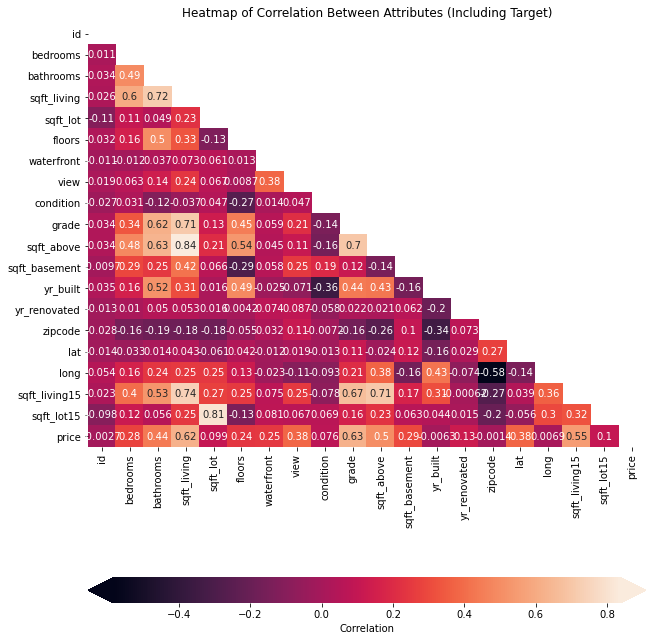

In [33]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 12))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [34]:
most_correlated_feature = "sqft_living"

In [35]:
def drop_corrfeats(df):
    '''Drop features which appear correlated'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

In [36]:
# Drop multicollinear features
df = drop_corrfeats(df)

In [37]:
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,0.0,0.0,3,8,0,1993,0.0,98029,47.5664,-121.999,529000.0
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,0.0,0.0,3,7,710,1994,0.0,98042,47.3545,-122.158,253000.0
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,0.0,0.0,4,7,0,1949,0.0,98117,47.6844,-122.392,545000.0
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,0.0,0.0,4,8,530,1980,0.0,98042,47.3451,-122.094,390000.0
16852,7841300285,8/11/2014,1,1.50,1048,4800,1.0,0.0,0.0,3,7,0,1942,0.0,98055,47.4759,-122.212,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,7853230570,9/15/2014,3,2.50,2230,5800,2.0,0.0,0.0,3,7,0,2004,0.0,98065,47.5308,-121.847,440000.0
21575,4140940150,10/2/2014,4,2.75,2770,3852,2.0,0.0,0.0,3,8,0,2014,0.0,98178,47.5001,-122.232,572000.0
5390,8658300480,7/21/2014,4,1.50,1530,9000,1.0,0.0,0.0,4,6,0,1976,0.0,98014,47.6492,-121.908,299800.0
860,1723049033,6/20/2014,1,0.75,380,15000,1.0,0.0,0.0,3,5,0,1963,0.0,98168,47.4810,-122.323,245000.0


In [38]:
# remove uncessary features

In [39]:
df = df.drop(['id', 'date'], axis = 1)

In [40]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
6405,3,2.50,1880,4499,2.0,0.0,0.0,3,8,0,1993,0.0,98029,47.5664,-121.999,529000.0
937,3,2.50,2020,6564,1.0,0.0,0.0,3,7,710,1994,0.0,98042,47.3545,-122.158,253000.0
15201,2,2.00,1430,3880,1.0,0.0,0.0,4,7,0,1949,0.0,98117,47.6844,-122.392,545000.0
13083,3,2.25,2270,32112,1.0,0.0,0.0,4,8,530,1980,0.0,98042,47.3451,-122.094,390000.0
16852,1,1.50,1048,4800,1.0,0.0,0.0,3,7,0,1942,0.0,98055,47.4759,-122.212,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0.0,0.0,3,7,0,2004,0.0,98065,47.5308,-121.847,440000.0
21575,4,2.75,2770,3852,2.0,0.0,0.0,3,8,0,2014,0.0,98178,47.5001,-122.232,572000.0
5390,4,1.50,1530,9000,1.0,0.0,0.0,4,6,0,1976,0.0,98014,47.6492,-121.908,299800.0
860,1,0.75,380,15000,1.0,0.0,0.0,3,5,0,1963,0.0,98168,47.4810,-122.323,245000.0


### Normalize Data

In [41]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
            'yr_renovated' ]:
    df[feat] = norm_feat(df[feat])
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,price
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,14999.000000,14999.000000,14999.000000,1.499900e+04
mean,-3.210609e-16,2.646282e-15,-1.173362e-16,3.926195e-17,-6.188352e-16,-2.348926e-16,-4.175383e-16,5.849785e-16,-3.184332e-17,2.324222e-16,2.795121e-15,2.840336e-15,98080.377892,47.562339,-122.226786,5.061264e+05
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,54.014400,0.138834,0.127266,2.823913e+05
min,-2.703841e+00,-2.228490e+00,-2.128103e+00,-8.928560e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-3.694660e+00,-4.361315e+00,-6.765498e-01,-2.376306e+00,-1.849200e-01,98001.000000,47.180300,-122.503000,7.800000e+04
25%,-3.804431e-01,-7.925178e-01,-7.637483e-01,-4.503591e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-6.417620e-01,-5.316560e-01,-6.765498e-01,-6.437795e-01,-1.849200e-01,98033.000000,47.473750,-122.333000,3.170000e+05
50%,-3.804431e-01,2.844610e-01,-1.411788e-01,-2.182458e-01,-8.853490e-01,-7.276368e-02,-2.822125e-01,-6.417620e-01,-5.316560e-01,-6.765498e-01,6.961370e-02,-1.849200e-01,98074.000000,47.575500,-122.255000,4.400000e+05
75%,7.812560e-01,6.434540e-01,6.270985e-01,3.643680e-02,9.636276e-01,-7.276368e-02,-2.822125e-01,8.846871e-01,4.257588e-01,6.446364e-01,8.509491e-01,-1.849200e-01,98118.000000,47.680100,-122.143000,6.200000e+05
max,3.104654e+00,3.156405e+00,3.534631e+00,1.174813e+01,3.737092e+00,1.374220e+01,5.359780e+00,2.411136e+00,4.255418e+00,4.728303e+00,1.530371e+00,5.458909e+00,98199.000000,47.777600,-121.802000,3.300000e+06


In [42]:
# Save a csv copy
df.to_csv('house_date_cleaned.csv')

One hot encoding function if needed

In [43]:
# Define one-hot encoding function
def one_hot_encode(df, catcols):
    '''Returns df with dummy vars and drops original column'''
    
    # Create DataFrame with above columns
    dfonehot = df[catcols].astype('category')
    
    # Get dummy variables and drop first one to not create dependency
    dfonehot = pd.get_dummies(dfonehot, drop_first = True)
    
    # Recreate DataFrame with one-hot encoded variables
    df = pd.concat([df,dfonehot], axis=1)
    
    # Drop columns where we have done one-hot encoding
    df = df.drop(catcols, axis = 1)
        
    return df

## Building a Baseline Model

In [44]:
df_model = df.copy()

In [45]:
# Define X_train and y_train. As single feature need to reshape X_train into column vector
X_train = np.array(df_model['sqft_living']).reshape(-1,1)
y_train = df_model['price']

In [46]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [47]:
from sklearn.model_selection import cross_validate, ShuffleSplit
import statsmodels.api as sm


# Create model in OLS
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     9576.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:12:36   Log-Likelihood:            -2.0583e+05
No. Observations:               14999   AIC:                         4.117e+05
Df Residuals:                   14997   BIC:                         4.117e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.061e+05   1801.401    280.963      0.000    5.03e+05     5.1e+05
x1          1.763e+05   1801.462     97.855      0.000    1.73e+05     1.8e+05
==============================================================================
Omnibus:                     6711.147   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64231.518
Skew:                           1.907   Prob(JB):                         0.00
Kurtosis:                      12.393   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
"""
Because we are using the .score method of LinearRegression, these
are r-squared scores. That means that each of them represents the
amount of variance of the target (listing price) that is explained
by the model's features (currently just the number of pieces) and
parameters (intercept value and coefficient values for the features)

In general this seems like a fairly strong model already. It is
getting nearly identical performance on training subsets compared to
the validation subsets, explaining around 80% of the variance both
times
"""

"\nBecause we are using the .score method of LinearRegression, these\nare r-squared scores. That means that each of them represents the\namount of variance of the target (listing price) that is explained\nby the model's features (currently just the number of pieces) and\nparameters (intercept value and coefficient values for the features)\n\nIn general this seems like a fairly strong model already. It is\ngetting nearly identical performance on training subsets compared to\nthe validation subsets, explaining around 80% of the variance both\ntimes\n"

We can interpret the RMSE as the mean error in USD, i.e. on average the actual price will be USD 220,000 more or less than our predicted price. This is actually not bad for just one feature! The standard deviation of around USD 9256 is decent meaning our model doest not appear to be overfitting.

The coefficent of sqft_living is 202, which means that for every additional square-foot of living area, the price increases by USD 202. In other words, house A with living area 1,000 sqft larger than house B will cost around USD 200,000 more, all other features equal.

One advantage of simple linear regression is that it is easy to visualise our predictions. Let us create a visualisation showing the data points vs. our regression line.


We see that for smaller living aras our model looks decent but as the sqft_living value increases our model's performance declines, signifiying that sqft_living is not a good enough predictor for larger houses.

We will want to keep track of our models so let us build a table which will have the name of the model and key metrics.

## Model 2

In [49]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

In [50]:
# Redefine X_train and y_train
X_train = df_model.drop(['price', 'lat', 'long', 'zipcode'], axis = 1)
y_train = df_model['price']

In [51]:
# Create model in OLS
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1994.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:12:36   Log-Likelihood:            -2.0238e+05
No. Observations:               14999   AIC:                         4.048e+05
Df Residuals:                   14986   BIC:                         4.049e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.061e+05   1431.371    353.596      0.000    5.03e+05    5.09e+05
bedrooms      -2.307e+04   1862.955    -12.382      0.000   -2.67e+04   -1.94e+04
bathrooms      2.157e+04   2497.346      8.636      0.000    1.67e+04    2.65e+04
sqft_living    9.188e+04   2982.207     30.809      0.000     8.6e+04    9.77e+04
sqft_lot      -1.039e+04   1536.373     -6.766      0.000   -1.34e+04   -7382.882
floors         2.242e+04   2044.955     10.961      0.000    1.84e+04    2.64e+04
waterfront     3.919e+04   1551.386     25.263      0.000    3.62e+04    4.22e+04
view           3.142e+04   1643.873     19.112      0.000    2.82e+04    3.46e+04
condition      1.518e+04   1578.729      9.615      0.000    1.21e+04    1.83e+04
grade          1.316e+05   2279.904     57.716      0.000    1.27e+05    1.36e+05
sqft_basement  8835.7784   1946.319      4.540      0.000    5020.755    1.27e+04
yr_built      -9.595e+04   2016.246    -47.590      0.000   -9.99e+04    -9.2e+04
yr_renovated   3896.1863   1508.725      2.582      0.010     938.900    6853.472
==============================================================================
Omnibus:                     5330.552   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44933.718
Skew:                           1.472   Prob(JB):                         0.00
Kurtosis:                      10.952   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
"""
Our second model got slightly better scores on the training
data, but worse scores on the validation data. This means that
it is a worse model overall, since what we care about is the
ability to generate prices for future LEGO sets, not the
ability to fit well to the known LEGO sets' features

It seems like adding in these other features is actually just
causing overfitting, rather than improving the model's ability
to understand the underlying patterns in the data
"""

"\nOur second model got slightly better scores on the training\ndata, but worse scores on the validation data. This means that\nit is a worse model overall, since what we care about is the\nability to generate prices for future LEGO sets, not the\nability to fit well to the known LEGO sets' features\n\nIt seems like adding in these other features is actually just\ncausing overfitting, rather than improving the model's ability\nto understand the underlying patterns in the data\n"

In [53]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

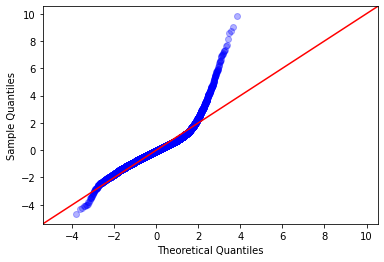

In [54]:
# QQ-plot of residuals
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

## Model 3

In [55]:
# Create copy
df_location = df.copy()

In [56]:
# One-hot encode neighbourhood
df_location = one_hot_encode(df_location, 'zipcode')

# Drop coord, lat, long, zipcode columns
df_location = df_location.drop(['lat', 'long'], axis = 1)

# Check 
df_location.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
6405,-0.380443,0.643454,-0.127933,-0.499844,0.963628,-0.072764,-0.282212,-0.641762,0.425759,-0.676550,...,0,0,0,0,0,0,0,0,0,0
937,-0.380443,0.643454,0.057514,-0.295880,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,1.028982,...,0,0,0,0,0,0,0,0,0,0
15201,-1.542142,-0.074532,-0.724010,-0.560983,-0.885349,-0.072764,-0.282212,0.884687,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
13083,-0.380443,0.284461,0.388668,2.227537,-0.885349,-0.072764,-0.282212,0.884687,0.425759,0.596593,...,0,0,0,0,0,0,0,0,0,0
16852,-2.703841,-0.792518,-1.230013,-0.470113,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Define X_train and y_train
X_train = df_location.drop('price', axis = 1)
y_train = df_location['price']

In [58]:
# Create model in OLS
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     793.4
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:12:37   Log-Likelihood:            -1.9702e+05
No. Observations:               14999   AIC:                         3.942e+05
Df Residuals:                   14917   BIC:                         3.948e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.161e+05   7671.158     41.207      0.000    3.01e+05    3.31e+05
bedrooms      -1.034e+04   1329.254     -7.778      0.000   -1.29e+04   -7734.030
bathrooms      1.133e+04   1767.400      6.411      0.000    7865.810    1.48e+04
sqft_living    1.227e+05   2230.416     54.997      0.000    1.18e+05    1.27e+05
sqft_lot       9485.0081   1196.054      7.930      0.000    7140.595    1.18e+04
floors        -1.477e+04   1611.956     -9.165      0.000   -1.79e+04   -1.16e+04
waterfront     4.392e+04   1099.966     39.925      0.000    4.18e+04    4.61e+04
view           4.125e+04   1187.591     34.732      0.000    3.89e+04    4.36e+04
condition      1.795e+04   1147.497     15.644      0.000    1.57e+04    2.02e+04
grade          6.152e+04   1765.473     34.846      0.000    5.81e+04     6.5e+04
sqft_basement -2.546e+04   1492.021    -17.065      0.000   -2.84e+04   -2.25e+04
yr_built      -1.762e+04   1750.889    -10.066      0.000   -2.11e+04   -1.42e+04
yr_renovated   7579.0057   1066.804      7.104      0.000    5487.939    9670.073
98002           2.29e+04   1.29e+04      1.777      0.076   -2359.831    4.82e+04
98003           911.5072   1.15e+04      0.079      0.937   -2.17e+04    2.35e+04
98004          6.531e+05   1.19e+04     55.106      0.000     6.3e+05    6.76e+05
98005          3.182e+05   1.41e+04     22.568      0.000    2.91e+05    3.46e+05
98006          2.623e+05   1.05e+04     24.880      0.000    2.42e+05    2.83e+05
98007          2.546e+05   1.45e+04     17.538      0.000    2.26e+05    2.83e+05
98008          2.466e+05   1.15e+04     21.533      0.000    2.24e+05    2.69e+05
98010          8.325e+04   1.73e+04      4.814      0.000    4.94e+04    1.17e+05
98011          1.412e+05   1.29e+04     10.968      0.000    1.16e+05    1.66e+05
98014           1.29e+05   1.83e+04      7.065      0.000    9.32e+04    1.65e+05
98019          9.372e+04   1.38e+04      6.781      0.000    6.66e+04    1.21e+05
98022         -5369.2512   1.32e+04     -0.408      0.683   -3.12e+04    2.04e+04
98023          -2.02e+04   9894.066     -2.041      0.041   -3.96e+04    -804.806
98024          1.362e+05   2.34e+04      5.824      0.000    9.04e+04    1.82e+05
98027          1.937e+05   1.09e+04     17.752      0.000    1.72e+05    2.15e+05
98028          1.286e+05   1.14e+04     11.288      0.000    1.06e+05    1.51e+05
98029          2.238e+05   1.12e+04     19.993      0.000    2.02e+05    2.46e+05
98030          1.285e+04   1.19e+04      1.077      0.282   -1.05e+04    3.62e+04
98031          1.724e+04   1.14e+04      1.507      0.132   -5187.027    3.97e+04
98032          -976.8953   1.52e+04     -0.064      0.949   -3.09e+04    2.89e+04
98033          3.596e+05   1.05e+04     34.180      0.000    3.39e+05     3.8e+05
98034          2.047e+05   9801.872     20.882   


Let's use stepwise selection to ensure we only have statistically significant results, dropping features which have a p-value greater than 0.05.

## Model 4

In [59]:
from pathlib import Path
import pickle


In [60]:
df_location

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
6405,-0.380443,0.643454,-0.127933,-0.499844,0.963628,-0.072764,-0.282212,-0.641762,0.425759,-0.676550,...,0,0,0,0,0,0,0,0,0,0
937,-0.380443,0.643454,0.057514,-0.295880,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,1.028982,...,0,0,0,0,0,0,0,0,0,0
15201,-1.542142,-0.074532,-0.724010,-0.560983,-0.885349,-0.072764,-0.282212,0.884687,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
13083,-0.380443,0.284461,0.388668,2.227537,-0.885349,-0.072764,-0.282212,0.884687,0.425759,0.596593,...,0,0,0,0,0,0,0,0,0,0
16852,-2.703841,-0.792518,-1.230013,-0.470113,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.380443,0.643454,0.335683,-0.371342,0.963628,-0.072764,-0.282212,-0.641762,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
21575,0.781256,1.002447,1.050976,-0.563749,0.963628,-0.072764,-0.282212,-0.641762,0.425759,-0.676550,...,0,0,0,0,0,0,1,0,0,0
5390,0.781256,-0.792518,-0.591548,-0.055273,-0.885349,-0.072764,-0.282212,0.884687,-1.489071,-0.676550,...,0,0,0,0,0,0,0,0,0,0
860,-2.703841,-1.869497,-2.114857,0.537357,-0.885349,-0.072764,-0.282212,-0.641762,-2.446486,-0.676550,...,0,0,0,0,1,0,0,0,0,0


### LOGS

In [61]:
#continuous_variables = ['sqft_living', 'sqft_lot']

#for var in continuous_variables:
   # ax, figure = plt.subplots(1,1,figsize=(12,8))
   # sns.distplot(df_location[var])

In [62]:
# log transformed
#for var in continuous_variables:
  #  ax, figure = plt.subplots(1,1,figsize=(12,8))
    #sns.distplot(np.log(abs(df_location[var])), hist=True)

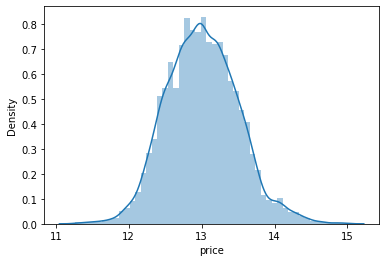

In [63]:
df_location.price = np.log(df_location.price)
sns.distplot(df_location.price);

In [64]:
df_location

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
6405,-0.380443,0.643454,-0.127933,-0.499844,0.963628,-0.072764,-0.282212,-0.641762,0.425759,-0.676550,...,0,0,0,0,0,0,0,0,0,0
937,-0.380443,0.643454,0.057514,-0.295880,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,1.028982,...,0,0,0,0,0,0,0,0,0,0
15201,-1.542142,-0.074532,-0.724010,-0.560983,-0.885349,-0.072764,-0.282212,0.884687,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
13083,-0.380443,0.284461,0.388668,2.227537,-0.885349,-0.072764,-0.282212,0.884687,0.425759,0.596593,...,0,0,0,0,0,0,0,0,0,0
16852,-2.703841,-0.792518,-1.230013,-0.470113,-0.885349,-0.072764,-0.282212,-0.641762,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,-0.380443,0.643454,0.335683,-0.371342,0.963628,-0.072764,-0.282212,-0.641762,-0.531656,-0.676550,...,0,0,0,0,0,0,0,0,0,0
21575,0.781256,1.002447,1.050976,-0.563749,0.963628,-0.072764,-0.282212,-0.641762,0.425759,-0.676550,...,0,0,0,0,0,0,1,0,0,0
5390,0.781256,-0.792518,-0.591548,-0.055273,-0.885349,-0.072764,-0.282212,0.884687,-1.489071,-0.676550,...,0,0,0,0,0,0,0,0,0,0
860,-2.703841,-1.869497,-2.114857,0.537357,-0.885349,-0.072764,-0.282212,-0.641762,-2.446486,-0.676550,...,0,0,0,0,1,0,0,0,0,0


In [65]:
df_location['price']

6405     13.178744
937      12.441145
15201    13.208541
13083    12.873902
16852    12.205823
           ...    
11964    12.994530
21575    13.256894
5390     12.610871
860      12.409013
15795    13.208541
Name: price, Length: 14999, dtype: float64

In [66]:
# Define X_train and y_train
X_train = df_location.drop('price', axis = 1)
y_train = df_location['price']

In [67]:
X_int = sm.add_constant(X_train)
model_4 = sm.OLS(y_train, X_int).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     793.4
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:12:37   Log-Likelihood:            -1.9702e+05
No. Observations:               14999   AIC:                         3.942e+05
Df Residuals:                   14917   BIC:                         3.948e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.161e+05   7671.158     41.207      0.000    3.01e+05    3.31e+05
bedrooms      -1.034e+04   1329.254     -7.778      0.000   -1.29e+04   -7734.030
bathrooms      1.133e+04   1767.400      6.411      0.000    7865.810    1.48e+04
sqft_living    1.227e+05   2230.416     54.997      0.000    1.18e+05    1.27e+05
sqft_lot       9485.0081   1196.054      7.930      0.000    7140.595    1.18e+04
floors        -1.477e+04   1611.956     -9.165      0.000   -1.79e+04   -1.16e+04
waterfront     4.392e+04   1099.966     39.925      0.000    4.18e+04    4.61e+04
view           4.125e+04   1187.591     34.732      0.000    3.89e+04    4.36e+04
condition      1.795e+04   1147.497     15.644      0.000    1.57e+04    2.02e+04
grade          6.152e+04   1765.473     34.846      0.000    5.81e+04     6.5e+04
sqft_basement -2.546e+04   1492.021    -17.065      0.000   -2.84e+04   -2.25e+04
yr_built      -1.762e+04   1750.889    -10.066      0.000   -2.11e+04   -1.42e+04
yr_renovated   7579.0057   1066.804      7.104      0.000    5487.939    9670.073
98002           2.29e+04   1.29e+04      1.777      0.076   -2359.831    4.82e+04
98003           911.5072   1.15e+04      0.079      0.937   -2.17e+04    2.35e+04
98004          6.531e+05   1.19e+04     55.106      0.000     6.3e+05    6.76e+05
98005          3.182e+05   1.41e+04     22.568      0.000    2.91e+05    3.46e+05
98006          2.623e+05   1.05e+04     24.880      0.000    2.42e+05    2.83e+05
98007          2.546e+05   1.45e+04     17.538      0.000    2.26e+05    2.83e+05
98008          2.466e+05   1.15e+04     21.533      0.000    2.24e+05    2.69e+05
98010          8.325e+04   1.73e+04      4.814      0.000    4.94e+04    1.17e+05
98011          1.412e+05   1.29e+04     10.968      0.000    1.16e+05    1.66e+05
98014           1.29e+05   1.83e+04      7.065      0.000    9.32e+04    1.65e+05
98019          9.372e+04   1.38e+04      6.781      0.000    6.66e+04    1.21e+05
98022         -5369.2512   1.32e+04     -0.408      0.683   -3.12e+04    2.04e+04
98023          -2.02e+04   9894.066     -2.041      0.041   -3.96e+04    -804.806
98024          1.362e+05   2.34e+04      5.824      0.000    9.04e+04    1.82e+05
98027          1.937e+05   1.09e+04     17.752      0.000    1.72e+05    2.15e+05
98028          1.286e+05   1.14e+04     11.288      0.000    1.06e+05    1.51e+05
98029          2.238e+05   1.12e+04     19.993      0.000    2.02e+05    2.46e+05
98030          1.285e+04   1.19e+04      1.077      0.282   -1.05e+04    3.62e+04
98031          1.724e+04   1.14e+04      1.507      0.132   -5187.027    3.97e+04
98032          -976.8953   1.52e+04     -0.064      0.949   -3.09e+04    2.89e+04
98033          3.596e+05   1.05e+04     34.180      0.000    3.39e+05     3.8e+05
98034          2.047e+05   9801.872     20.882   

### Testing Our Final Model

### Checking Normality

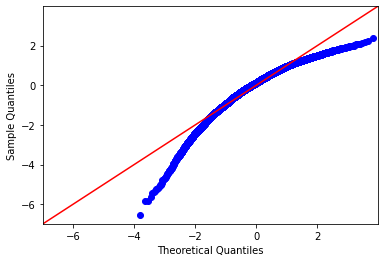

In [68]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

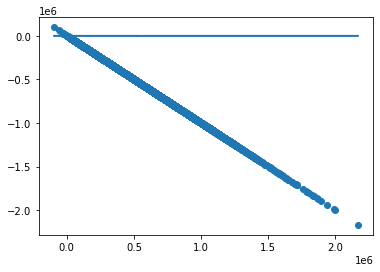

In [69]:
plt.scatter(model.predict(X_int), model.resid)
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))])

### Making Predictions

### Preprocess Test Data

In [70]:
X_test = X_test.drop(['id', 'date'], axis = 1)

In [71]:
X_test.waterfront.fillna(0,inplace=True)
X_test.yr_renovated.fillna(0,inplace=True)
X_test.view.fillna(0,inplace=True)

difference = (X_test.loc[X_test["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(X_test.loc[X_test["sqft_basement"] == '?', ["sqft_above"]]).values
X_test.loc[X_test["sqft_basement"] == '?', ["sqft_basement"]] = difference

X_test.sqft_basement = X_test.sqft_basement.astype(float)
X_test.sqft_basement = X_test.sqft_basement.astype('int64')

In [72]:
X_test = drop_corrfeats(X_test)


In [73]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
3686,3,0.75,850,8573,1.0,0.0,0.0,3,6,250,1945,0.0,98146,47.5030,-122.356
10247,3,1.00,1510,6083,1.0,0.0,0.0,4,6,650,1940,0.0,98115,47.6966,-122.324
4037,4,2.25,1790,42000,1.0,0.0,0.0,3,7,620,1983,0.0,98045,47.4819,-121.744
3437,2,1.50,1140,2500,1.0,0.0,1.0,3,7,510,1988,0.0,98106,47.5707,-122.359
19291,3,1.00,1500,3920,1.0,0.0,0.0,3,7,500,1947,0.0,98107,47.6718,-122.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18276,5,1.00,1170,6757,1.0,0.0,0.0,4,6,370,1944,0.0,98125,47.7332,-122.304
15003,3,1.75,1670,5100,1.0,0.0,2.0,5,7,680,1954,0.0,98144,47.5898,-122.291
13478,4,2.25,3260,4640,2.0,0.0,0.0,5,9,900,1907,0.0,98112,47.6272,-122.312
18399,4,5.00,5820,13906,2.0,0.0,0.0,3,11,2070,1993,0.0,98042,47.3814,-122.164


In [74]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
            'yr_renovated' ]:
    X_test[feat] = norm_feat(X_test[feat])
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5.400000e+03,5400.000000,5400.000000,5400.000000
mean,-1.578984e-16,-2.014027e-16,-1.425197e-16,2.638836e-17,-2.678927e-16,5.818391e-17,6.825816e-17,-4.275592e-16,-1.234815e-16,1.831868e-16,7.054647e-16,-4.060230e-16,98077.507222,47.557447,-122.214770
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,53.595322,0.139365,0.137951
min,-2.412555e+00,-1.767217e+00,-1.808890e+00,-3.367887e-01,-9.158511e-01,-8.076235e-02,-3.121087e-01,-3.705360e+00,-3.084873e+00,-6.509624e-01,-2.402522e+00,-1.945586e-01,98001.000000,47.162200,-122.515000
25%,-3.818798e-01,-4.716297e-01,-7.084397e-01,-2.352871e-01,-9.158511e-01,-8.076235e-02,-3.121087e-01,-6.280078e-01,-5.532143e-01,-6.509624e-01,-6.752800e-01,-1.945586e-01,98032.000000,47.465725,-122.327000
50%,-3.818798e-01,1.761638e-01,-1.745578e-01,-1.748415e-01,1.464673e-02,-8.076235e-02,-3.121087e-01,-6.280078e-01,-5.532143e-01,-6.509624e-01,1.375396e-01,-1.945586e-01,98065.000000,47.568900,-122.228000
75%,6.334578e-01,5.000606e-01,4.900707e-01,-1.061684e-01,9.451446e-01,-8.076235e-02,-3.121087e-01,9.106683e-01,2.906719e-01,5.955469e-01,8.826242e-01,-1.945586e-01,98118.000000,47.677500,-122.127000
max,3.007825e+01,7.301892e+00,8.683524e+00,2.656818e+01,2.806140e+00,1.237971e+01,4.926079e+00,2.449344e+00,4.510103e+00,6.737439e+00,1.492239e+00,5.192506e+00,98199.000000,47.777500,-121.315000


In [75]:
X_test = one_hot_encode(X_test, 'zipcode')

# Drop coord, lat, long, zipcode columns
X_test = X_test.drop(['lat', 'long'], axis = 1)


In [76]:
# Load model from Pickle
model_4, X_train, y_train = pickle.load(open("model_4.pkl", 'rb'))


### Final Model

In [77]:
# Run this cell without changes
X_train_final = df_location.drop('price', axis = 1)
X_test_final = X_test

In [78]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)


-2.104326428060524

In [79]:
y_test = np.log(y_test)

In [80]:
final_model_2 = LinearRegression()
final_model_2.fit(X_train_final, y_train)
# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.8604963063017361